In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib 


Using matplotlib backend: TkAgg


In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height: 70% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv("../datasets/titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
male = X['Sex'] == 'male'
female = X['Sex'] != 'male'
X.loc[male, 'Age'] = X.loc[male, 'Age'].fillna(X.loc[male, 'Age'].median())
X.loc[female, 'Age'] = X.loc[female, 'Age'].fillna(X.loc[female, 'Age'].median())
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

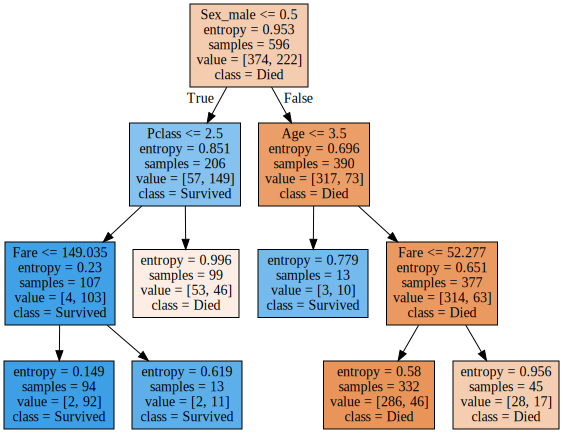

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X), class_names=['Died', 'Survived'],
                                   filled = True))

display(SVG(graph.pipe(format="svg")))

In [11]:
clf_rf = RandomForestClassifier()

In [12]:
params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [13]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)

In [14]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [15]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [16]:
best_clf = grid_search_cv_clf.best_estimator_

In [18]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                    'feature_importances': best_clf.feature_importances_})

In [20]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.308441
6,Sex_male,0.207228
4,Fare,0.131102
0,Pclass,0.126931
1,Age,0.103274
2,SibSp,0.038711
3,Parch,0.035055
9,Embarked_S,0.025257
7,Embarked_C,0.016811
8,Embarked_Q,0.007190
